In [170]:
#Import necessary libraries to complete the tasks asked of us

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the datasets that we are being asked to analyze

df=pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")
#df=pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-test.csv")

In [171]:
#See the measures of central tendency for each variable within the dataset
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [172]:
#Print the first few rows
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [173]:
#Print the shape of the dataframe
print(df.shape)

(1460, 81)


In [174]:
#Print the DataFrame's data types
pd.set_option('display.max_rows', None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [175]:
#Check for missing values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Visualization for Data

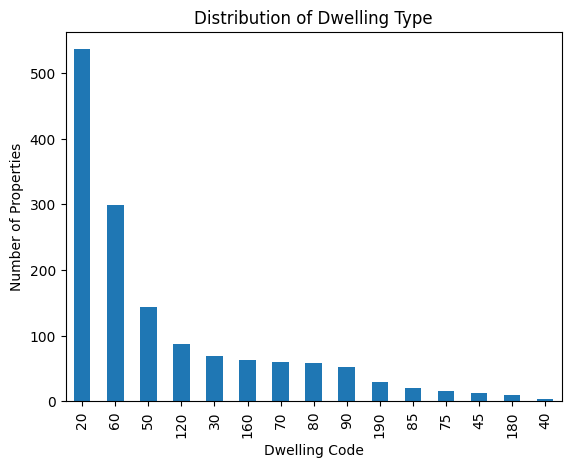

In [176]:
#Visualization for MSSubClass

df.MSSubClass.value_counts().plot(kind='bar')
plt.title('Distribution of Dwelling Type')
plt.xlabel('Dwelling Code')
plt.ylabel('Number of Properties')
plt.show()

#Based on this distribution, the Dwelling type is skewed to the right. Because this is a definitive value that cannot change without changing the property type,
# this will not affect the way that we clean the data.

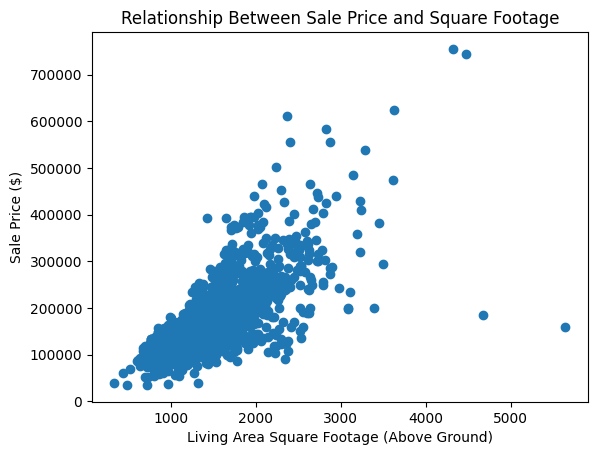

In [177]:
#Visualization of Relationship Between Living Area Square Footage and Sale Price

plt.scatter(df.GrLivArea, df.SalePrice)
plt.xlabel("Living Area Square Footage (Above Ground)")
plt.ylabel("Sale Price ($)")
plt.title("Relationship Between Sale Price and Square Footage")
plt.show()

#Based on this visualization, there is a positive relationship between Living Area Square Footage and the Sale Price. Looking at the graph, we can see potential outliers
#on sale price greater than 700000 and Living square footage greater than 4000. We need to look at the data points to see if it is actually an outlier.Based on the Visual,
#we can see that the value GrLivArea greater than 4000 can be eliminated as these values are outliers.

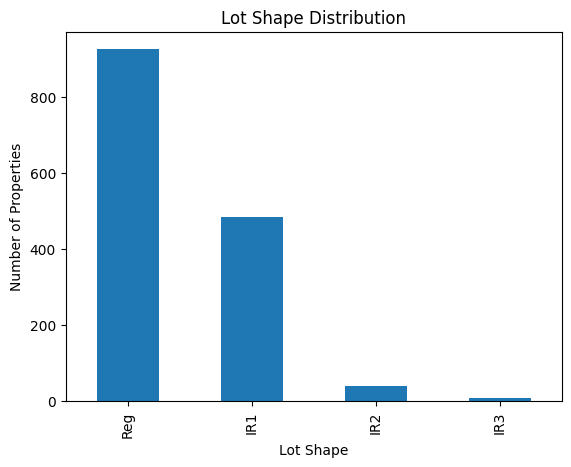

In [178]:
#Visualization of Lot Shape Distribution
df.LotShape.value_counts().plot(kind='bar')
plt.title("Lot Shape Distribution")
plt.xlabel('Lot Shape')
plt.ylabel('Number of Properties')
plt.show()

#Based on the visualization there is a skew in the distribution. From the distribution, I can see that there is one value most likely if there happens to be a missing value in this field.

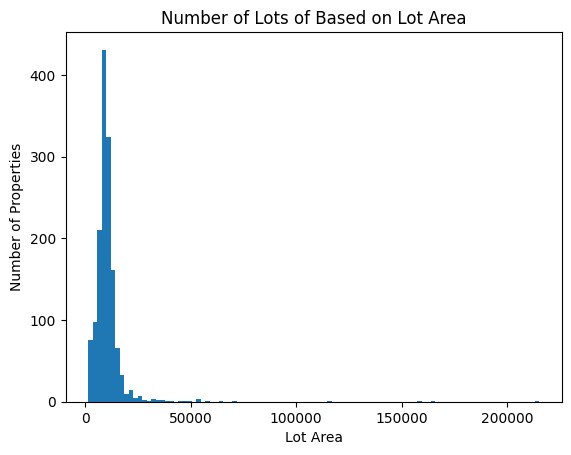

In [179]:
#Distribution of Lot Area
plt.hist(df.LotArea, align="mid", bins=100)
plt.xlabel('Lot Area')
plt.ylabel("Number of Properties")
plt.title('Number of Lots of Based on Lot Area')
plt.show()

#Based on the Lot Area, we remove the lots greater than 60000 to make the distribution look more normal

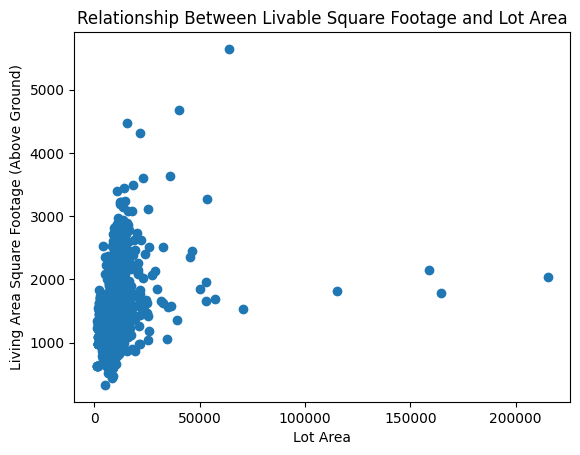

In [180]:
#Visualization of Relationship Between Living Area Square Footage and Sale Price

plt.scatter(df.LotArea ,df.GrLivArea)
plt.xlabel("Lot Area")
plt.ylabel("Living Area Square Footage (Above Ground)")
plt.title("Relationship Between Livable Square Footage and Lot Area")
plt.show()

#Based on this relationship it is hard to draw any conclusions to eliminate outliers because this is dependent on the way the house is built.

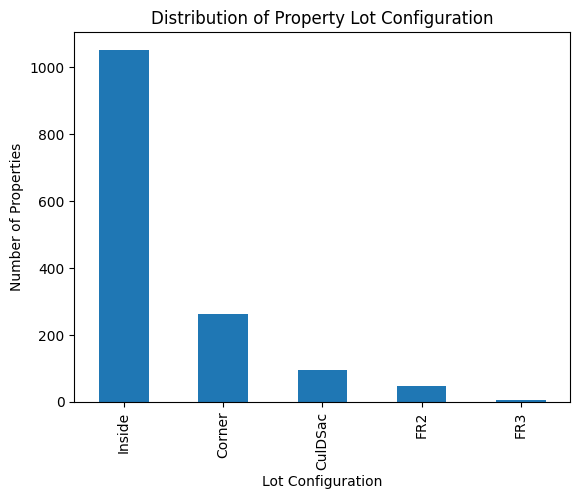

In [181]:
#Distribution of the Lot Configuration
df.LotConfig.value_counts().plot(kind='bar')
plt.title('Distribution of Property Lot Configuration')
plt.xlabel('Lot Configuration')
plt.ylabel('Number of Properties')
plt.show()

#Based on this we can see that there is a popular lot configuration of housing on the market.

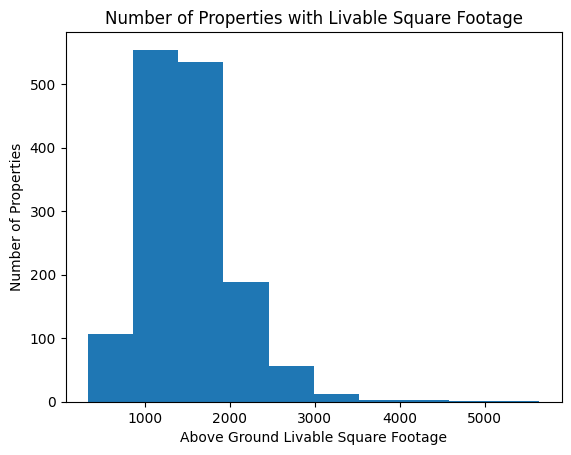

In [182]:
## Visualize the distribution of a numeric column
plt.hist(df['GrLivArea'])
plt.xlabel('Above Ground Livable Square Footage')
plt.ylabel('Number of Properties')
plt.title("Number of Properties with Livable Square Footage")
plt.show()

#Removing the values of this variable greater than 4000 can make the distribution more normal.

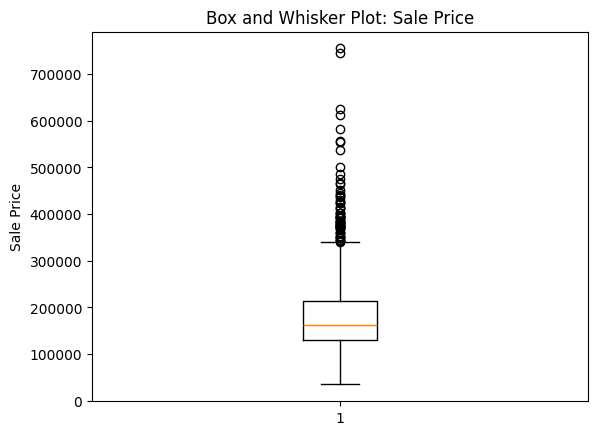

In [183]:
#Display the distribution of a Numerical Column
plt.boxplot(df['SalePrice'])
plt.ylabel('Sale Price')
plt.title ('Box and Whisker Plot: Sale Price')
plt.show()

#There are some values towards the top that are greater than 700000 that we need to reevaluate for any outliers.

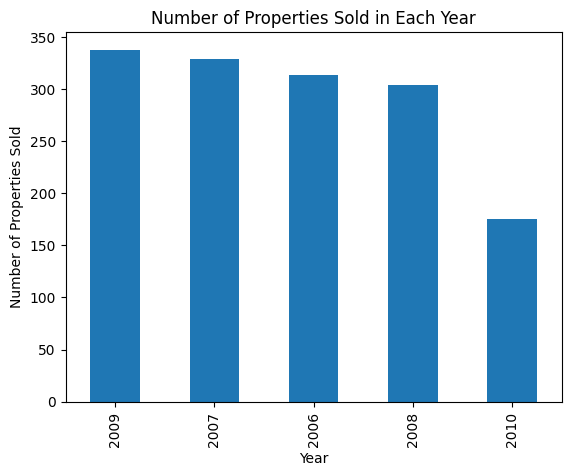

In [184]:
#Visual to show the distribution of properties based on year sold
df.YrSold.value_counts().plot(kind='bar')
plt.title("Number of Properties Sold in Each Year")
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.show()

#This shows a pretty uniform distribution meaning that there are the same amount of houses sold each year. This doesnt' really affect the data cleaning process since there aren't any values missing.

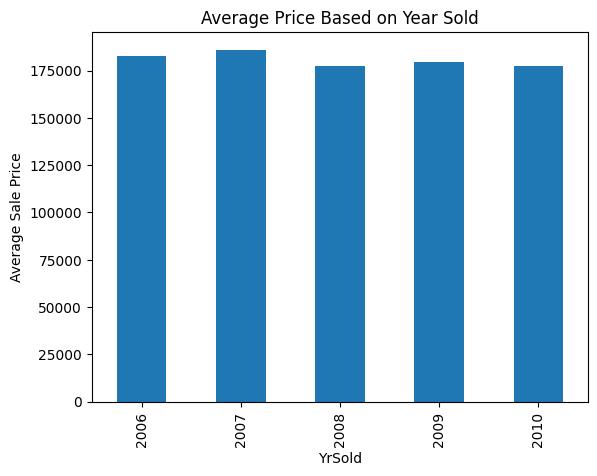

In [185]:
#Visualization to show the relationship between a Categorical and Numeric Column
df_grouped = df.groupby('YrSold')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Average Sale Price')
plt.title("Average Price Based on Year Sold")
plt.show()

#This shows a pretty uniform distribution meaning that there are the same amount of houses sold each year. This doesnt' really affect the data cleaning process since there aren't any values missing.

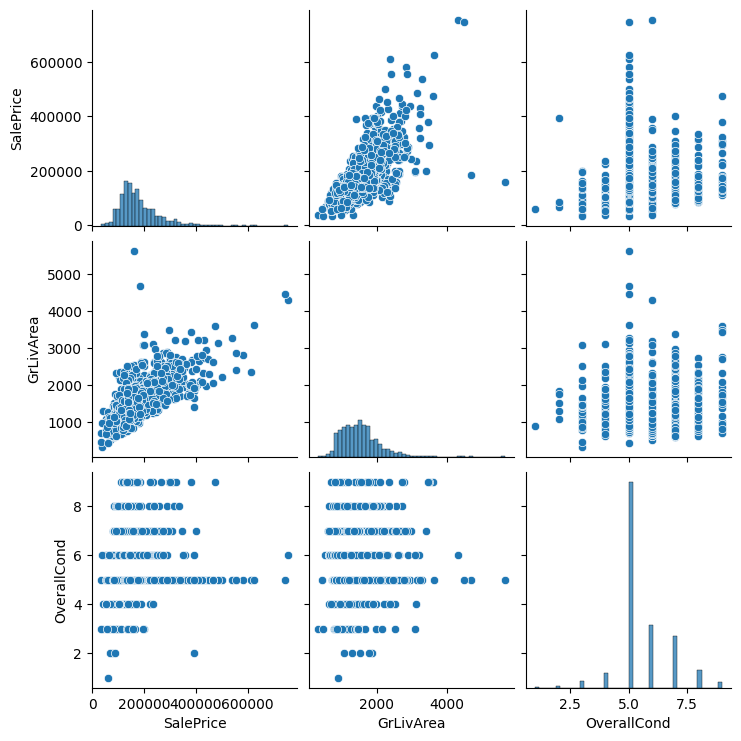

In [186]:
## Create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['SalePrice', 'GrLivArea', 'OverallCond'])
plt.show()

#Shows postive and somewhat normal distributions for these variables.

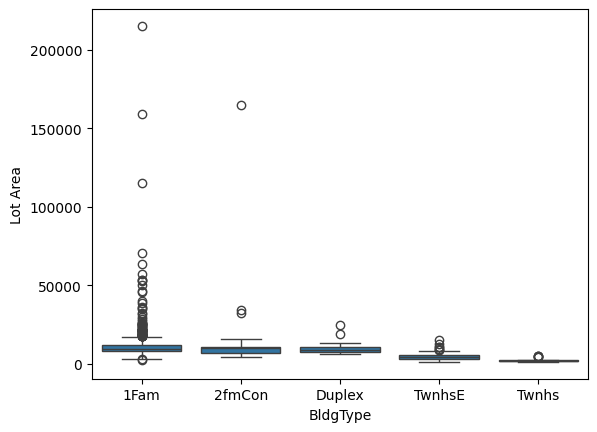

In [187]:
## Create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='BldgType', y='LotArea', data=df)
plt.ylabel('Lot Area')
plt.show()

#There are potential outliers here that need to be addresses in the later part of the data cleaning process

Data Quality

In [188]:
#Create a copy to manipulate the data
df_data_manipulation=df.copy()
print((df_data_manipulation.isnull().sum()/(df_data_manipulation.shape[0]))*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [189]:
#Formula for missing value percentage
missing_val_percentage=df.isnull().sum()/(df.shape[0])*100

In [190]:
#Drop data with 45% missing data as it is irrelevant and update the state of the dataframe
df_data_manipulation.drop(missing_val_percentage[missing_val_percentage > 45].index, axis=1,inplace=True)

In [191]:
#Narrow Down Data Set to Begin Get Necessary Data Only
df_narrowed=df_data_manipulation[['MSSubClass','LotArea','Utilities','Neighborhood','OverallQual','OverallCond', 'YearRemodAdd','Foundation','BsmtCond','BsmtQual', 'TotalBsmtSF', 'Heating','CentralAir', 'Electrical','BedroomAbvGr','FullBath','HalfBath','GarageArea', 'GarageCond', 'MiscVal','PoolArea','PavedDrive','GrLivArea','KitchenAbvGr','SalePrice']]

#Chose the Data for the Following Reasons
#MSSubClass, Utilities, LotArea, OverallCond, OverallQual, BsmtCond, BsmntQual, TotalBsmtSF, BedroomAbvGr,FullBath , HalfBath, GarageArea, GarageCond, GrLivArea, KitchenAbvGr, SalePrice, YearRemodAdd, Foundation
    #This group of variables are important and basic pieces of infomration about the property that contribute to the value
#Utilities, Heating, CentralAir, Electric, MiscVal, PoolArea, PavedDrive
    #Extra things that are not a part of the structure of the house, but depending on the level of the item can adjust the house value
#Neighborhood
    #Housing in certain areas are worth more than other areas. This is a great predictor.

In [192]:
#Dropping individual records with low amounts of missing data (went from 1460 to 1348 records)
df_narrowed.dropna(subset=['Electrical','BsmtCond','BsmtQual','GarageCond'],inplace=True)
print((df_narrowed.isnull().sum()/(df_narrowed.shape[0]))*100)

MSSubClass      0.0
LotArea         0.0
Utilities       0.0
Neighborhood    0.0
OverallQual     0.0
OverallCond     0.0
YearRemodAdd    0.0
Foundation      0.0
BsmtCond        0.0
BsmtQual        0.0
TotalBsmtSF     0.0
Heating         0.0
CentralAir      0.0
Electrical      0.0
BedroomAbvGr    0.0
FullBath        0.0
HalfBath        0.0
GarageArea      0.0
GarageCond      0.0
MiscVal         0.0
PoolArea        0.0
PavedDrive      0.0
GrLivArea       0.0
KitchenAbvGr    0.0
SalePrice       0.0
dtype: float64


<ipython-input-192-88cf552cef8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narrowed.dropna(subset=['Electrical','BsmtCond','BsmtQual','GarageCond'],inplace=True)


In [198]:
##Calculate IQR and replace outliers using the following function for numerical data
def find_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = []
    for value in data:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)

    return outliers

#Store the outlier Values for each numerical column
lot_area_outliers=find_outliers_iqr(df_narrowed['LotArea']) #77 records, skewed distribution, replace with median
TotalBsmntSF_outliers=find_outliers_iqr(df_narrowed['TotalBsmtSF']) #21 Records, slightly skewed, replace with mean since it is closer to normal distribution
BedroomAbvGr_outliers=find_outliers_iqr(df_narrowed['BedroomAbvGr']) #28 records, normal distribution, valid outliers keep the way it is
FullBath_outliers=find_outliers_iqr(df_narrowed['FullBath']) #No outliers, can drop
HalfBath_outliers=find_outliers_iqr(df_narrowed['HalfBath'])#No outliers, can drop
GarageArea_outliers=find_outliers_iqr(df_narrowed['GarageArea']) #43 records, replace with median
MiscVal_outliers=find_outliers_iqr(df_narrowed['MiscVal']) #47 records, replace with mean
PoolArea_outliers=find_outliers_iqr(df_narrowed['PoolArea']) #Smaller amount of Values, mostly 0, keep values
GrLivArea_outliers=find_outliers_iqr(df_narrowed['GrLivArea']) #29 records, slightly skewed right dropping the values will make distribution normal
KitchenAbvGr_outliers=find_outliers_iqr(df_narrowed['KitchenAbvGr']) #40 records, Mostly one value, can leave it is valid outlier

In [194]:
#Make all the adjustments to the data based on the conclusions drawn in the section above
df_narrowed['LotArea'].replace(lot_area_outliers,df_narrowed['LotArea'].median(), inplace=True)

df_narrowed['TotalBsmtSF'].replace(TotalBsmntSF_outliers,df_narrowed['TotalBsmtSF'].mean(), inplace=True)

df_narrowed['GarageArea'].replace(GarageArea_outliers,df_narrowed['GarageArea'].median(), inplace=True)

df_narrowed['MiscVal'].replace(MiscVal_outliers,df_narrowed['MiscVal'].mean(), inplace=True)


#Dropping Values

df_narrowed = df_narrowed[~df_narrowed['FullBath'].isin(FullBath_outliers)]

df_narrowed = df_narrowed[~df_narrowed['HalfBath'].isin(HalfBath_outliers)]

df_narrowed = df_narrowed[~df_narrowed['FullBath'].isin(FullBath_outliers)]

df_narrowed = df_narrowed[~df_narrowed['GrLivArea'].isin(GrLivArea_outliers)]

<ipython-input-194-d29de9213da0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_narrowed['LotArea'].replace(lot_area_outliers,df_narrowed['LotArea'].median(), inplace=True)
<ipython-input-194-d29de9213da0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narrowed['LotArea'].replace(lot_area_outliers,df_narrowed['LotArea'].median(), inp

In [195]:
#Check for Duplicated Rows
df[df.duplicated()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Colinearity


In [196]:
#Select the fields in the table that havenumerical values only
numerical_columns = df_narrowed.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix for numerical columns
correlation_matrix = df_narrowed[numerical_columns].corr()

# Flatten the correlation matrix into a table format
collinearity_table = (
    correlation_matrix
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'})
)

# Remove self-correlations (correlation = 1)
collinearity_table = collinearity_table[collinearity_table['Variable 1'] != collinearity_table['Variable 2']]

# Sort the table by absolute correlation values in descending order
collinearity_table = collinearity_table.reindex(
    collinearity_table['Correlation'].abs().sort_values(ascending=False).index
)

# Display the most correlated pairs
print(collinearity_table)

       Variable 1    Variable 2  Correlation
212     SalePrice   OverallQual     0.797880
44    OverallQual     SalePrice     0.797880
222     SalePrice     GrLivArea     0.693835
194     GrLivArea     SalePrice     0.693835
187     GrLivArea      FullBath     0.610183
117      FullBath     GrLivArea     0.610183
219     SalePrice    GarageArea     0.592438
149    GarageArea     SalePrice     0.592438
89    TotalBsmtSF     SalePrice     0.580208
215     SalePrice   TotalBsmtSF     0.580208
42    OverallQual     GrLivArea     0.566245
182     GrLivArea   OverallQual     0.566245
37    OverallQual      FullBath     0.554356
107      FullBath   OverallQual     0.554356
34    OverallQual  YearRemodAdd     0.552574
62   YearRemodAdd   OverallQual     0.552574
214     SalePrice  YearRemodAdd     0.534735
74   YearRemodAdd     SalePrice     0.534735
119      FullBath     SalePrice     0.533209
217     SalePrice      FullBath     0.533209
137    GarageArea   OverallQual     0.510583
39    Over

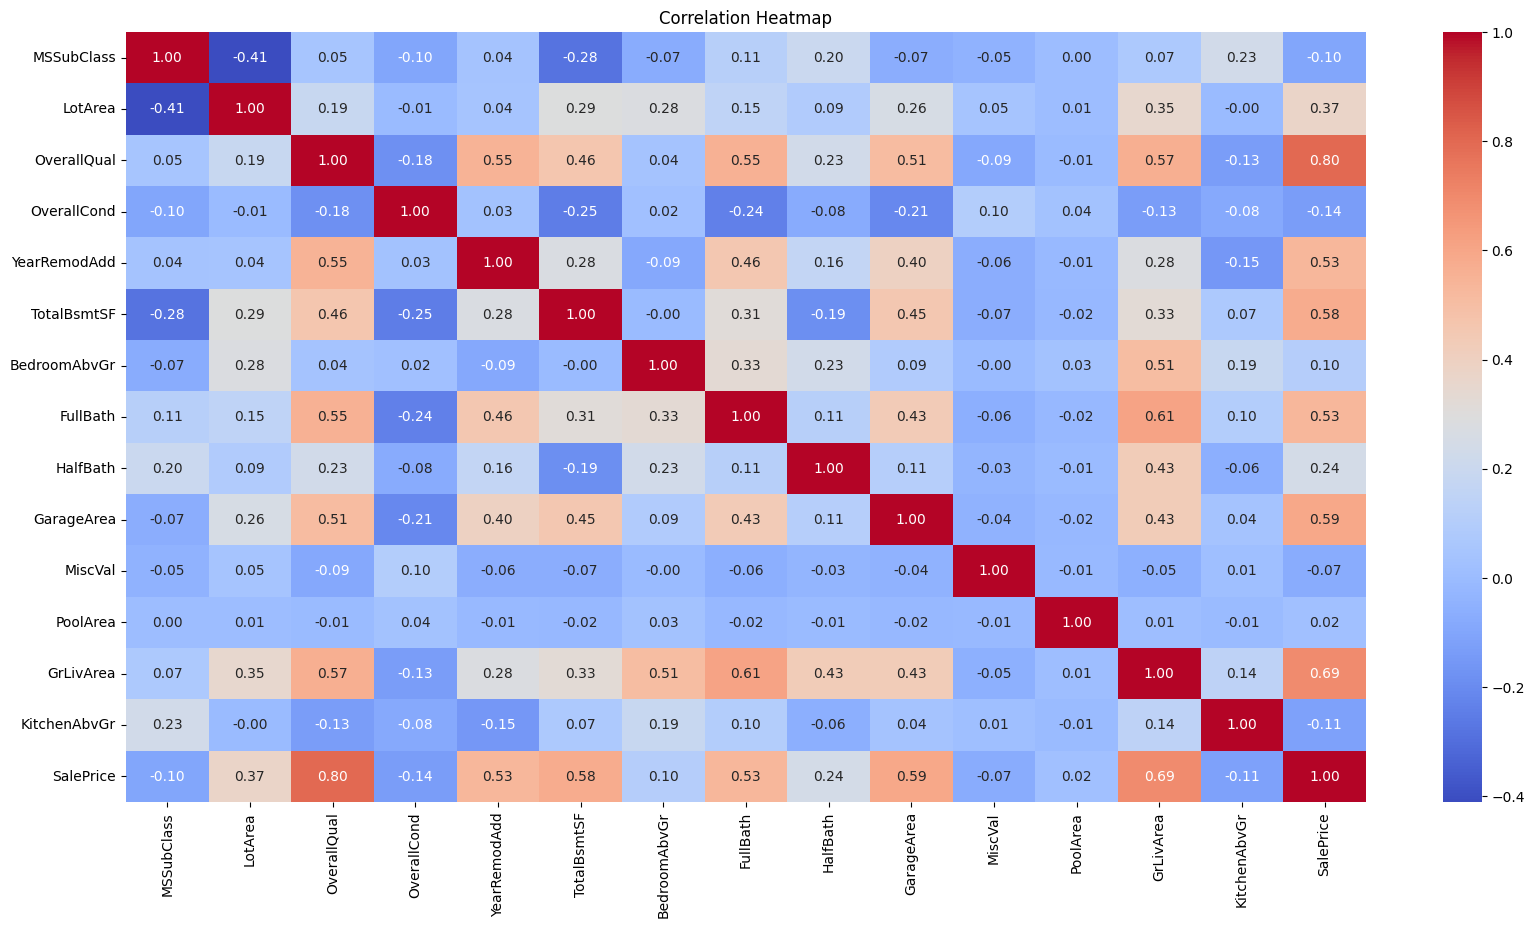

In [197]:
# Generate the heatmap that visualizes the Collinearity Values
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

#Based on this heatmap there are no values to drop greater than .75 and are considered an unknown relationship. Overall Quality and Sale Price have a very strong relationship as they are dependent on eachother.
#Dropping the values in Data Quality part of this code helped decrease the collinearity.